In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':69000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':.96,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-28 to 2019-06-28 - 100'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PEP,64,4.091978,1.631001,2.406688,2.258496
KO,64,3.970016,1.650352,2.304569,3.383609
MCD,64,3.606624,1.507283,2.282224,2.999196
MDLZ,64,4.270402,1.923689,2.133264,3.693187
UL,64,4.065343,2.115294,1.843089,2.359091
SBUX,64,5.004817,3.186947,1.518114,4.600183
UN,64,3.147659,2.149171,1.387043,2.597613
PG,64,2.896045,1.990579,1.371148,4.809913
LMT,64,5.786328,4.207466,1.335640,5.015020


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PEP'] -1.1549883183919256 0.6 0.4516992690203144 2.40668758741224
['PEP', 'KO'] -1.256311437505485 0.5351062602660859 0.5642105648514756 2.3556282626230463
['PEP', 'MCD'] -1.2719427607839076 0.5467439838420676 0.5257692651261648 2.34445600975214
['PEP', 'UL'] -1.4874443052063975 0.17568552131940307 0.4617587038683718 2.1248885303941725
['KO', 'UL'] -1.571996443878191 -0.0724372379727447 0.574269999699533 2.073829205604979


['KO', 'UL']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['KO', 'UL'], sr=0)

['KO', 'UL'] 0.5018327617267883 -0.0724372379727447 0.574269999699533 2.073829205604979
['KO', 'UL', 'PEP'] 0.3461979373440416 0.21278484787091476 0.5334130894731268 2.1847819995407325
['KO', 'UL', 'PEP', 'MCD'] -0.020168091894306822 0.22981227569284432 0.5500196324128489 2.2091426076785594
['KO', 'UL', 'PEP', 'LMT'] -0.053845848591151046 0.0953433273785722 0.6508108240302768 1.9724965999622295
['KO', 'UL', 'PEP', 'WMT'] -0.08730322856330386 0.14547662848345336 0.5672201429532429 1.8788525260598659
['KO', 'UL', 'MCD', 'WMT'] -0.13029288954649082 0.06545196944734115 0.6042551410061681 1.847736737229816
['KO', 'UL', 'MCD', 'NEE'] -0.18094034611126103 -0.0005990866367487172 0.6196587405254878 1.8168566938577095


['KO', 'UL', 'MCD', 'NEE']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['KO', 'UL', 'MCD', 'NEE'], sr=0)

['KO', 'UL', 'MCD', 'NEE'] -0.18094034611126103 -0.0005990866367487172 0.6196587405254878 1.8168566938577095
['KO', 'UL', 'MCD', 'NEE', 'PEP'] -0.5107391684386422 0.10319398533690483 0.5860668462244532 1.9348228725686156
['KO', 'UL', 'MCD', 'NEE', 'PEP', 'MDLZ'] -0.8105185835952908 0.17798615710261287 0.6114952593020964 1.9678963182979958
['KO', 'UL', 'MCD', 'NEE', 'PEP', 'UN'] -0.8921838478335855 0.13284000908314073 0.5749761430832738 1.843526210626201
['KO', 'UL', 'MCD', 'NEE', 'UN', 'LMT'] -0.9034227198503014 0.029717010619522928 0.6668602695301757 1.6650183462619477
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'] -0.9471067171522715 0.04176013403557543 0.6111331488121532 1.6025889636603718


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT']

In [7]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 8, ['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'], sr=0)

['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'] -0.9471067171522715 0.04176013403557543 0.6111331488121532 1.6025889636603718
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP'] -1.3140453973413906 0.09759772238814764 0.5883568802704618 1.7174601956249245
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'MDLZ'] -1.6386091703150898 0.1542488938619673 0.6071419358229433 1.7694356145399213
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'LMT'] -1.690275307421846 0.06953691887878444 0.6401877736993701 1.669732721325149
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'] -1.7018411852974134 0.1275006818944002 0.5706581328081869 1.665668524283881


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO']

In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 10, ['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'], sr=0)

['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'] -1.7018411852974134 0.1275006818944002 0.5706581328081869 1.665668524283881
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ'] -2.039544131684881 0.17113338085336283 0.5893224874617565 1.7176235268017717
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ', 'SBUX'] -2.387186389712305 0.19041970373917178 0.6223939065485234 1.6976726211050412
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ', 'LMT'] -2.442795908473291 0.1265134500409555 0.6306906414857535 1.6794252142442665
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'COST'] -2.4542935462969906 0.10605642502851234 0.6396500286744974 1.5634333850950222
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T'] -2.4568016101797747 0.06544120093128901 0.6777571888889364 1.5243959433657124


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T']

In [12]:
quote.setup_mask(['MCD', 'NEE', 'UN', 'WMT', 'DEO', 'LMT', 'T'])
quote.find_optimal_ratio(21, 3, .91)

({'MCD': 0.24,
  'NEE': 0.13,
  'UN': 0.18,
  'WMT': 0.03,
  'DEO': 0.08,
  'LMT': 0.11,
  'T': 0.12},
 3.0365,
 0.6547)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,3.361122,0.737106,1.546489,2.978764,3.333160,3.862801,5.299613,4.333777,1.184859
PEP,64.0,4.091978,1.631001,0.437330,3.119043,4.330590,5.012788,7.553566,2.406688,2.258496
KO,64.0,3.970016,1.650352,0.387284,2.900776,3.902778,4.806078,8.396620,2.304569,3.383609
MCD,64.0,3.606624,1.507283,-0.558029,2.976761,3.851731,4.617824,6.412885,2.282224,2.999196
UL,64.0,4.065343,2.115294,0.453887,2.458353,3.907076,5.588315,9.185805,1.843089,2.359091
UN,64.0,3.147659,2.149171,-0.393697,1.651823,2.734626,4.097116,8.559660,1.387043,2.597613
LMT,64.0,5.786328,4.207466,-2.989561,3.013879,5.600918,9.067968,14.118079,1.335640,5.015020
DEO,64.0,2.211109,1.568874,-0.756932,1.386040,2.108423,3.236296,5.704873,1.303127,2.233835
WMT,64.0,3.399674,3.363987,-1.971514,0.564209,3.298066,5.574186,9.208715,0.961064,3.343207
NEE,64.0,2.601645,2.907284,-2.317953,0.075171,2.082314,4.545932,9.475382,0.837544,3.651279


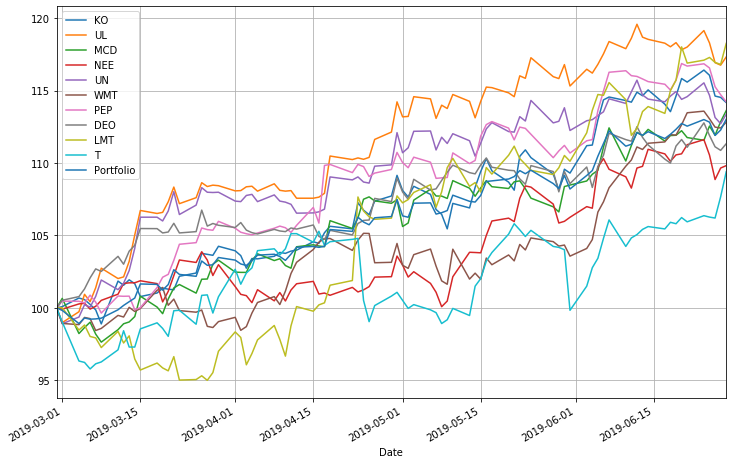

In [14]:
%pylab inline
quote.setup_mask(['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T'])
quote.graph(21, {'UL': 0.03, 'KO': 0.03, 'PEP': 0.03, 'MCD': 0.25,
  'NEE': 0.13,
  'UN': 0.19,
  'WMT': 0.03,
  'DEO': 0.08,
  'LMT': 0.11,
  'T': 0.12})